#Theoretical Questions

1. What is K-Nearest Neighbors (KNN) and how does it work?

KNN is a lazy, non-parametric, instance-based learning algorithm used for classification and regression. It classifies a new point based on the majority class of its K nearest neighbors using a distance metric like Euclidean.

2. Difference between KNN Classification and KNN Regression

Classification: Majority voting among neighbors.

Regression: Predicts the average (mean or weighted) value of neighbors.

3. Role of the distance metric in KNN
Distance determines closeness. Common ones:

Euclidean: √((x2 - x1)² + (y2 - y1)²)

Manhattan: |x2 - x1| + |y2 - y1|

Affects prediction accuracy.

4. What is the Curse of Dimensionality in KNN?
In high dimensions, distance loses meaning because data becomes sparse. It leads to decreased accuracy in KNN due to less distinguishable neighbors.

5. How can we choose the best value of K in KNN?
Use Cross-validation, Elbow method, or GridSearchCV to find the value of K that minimizes prediction error.

6. What are KD Tree and Ball Tree in KNN?
Efficient data structures for speeding up nearest neighbor search.

KD Tree: Binary tree using axis-aligned splits.

Ball Tree: Uses spherical regions; better for high-dimensional data.

7. When to use KD Tree vs Ball Tree

KD Tree: Best for low dimensions (<20)

Ball Tree: Better for high dimensions or non-Euclidean spaces.

8.Disadvantages of KNN

Slow prediction (lazy learning)

Sensitive to noisy/irrelevant features

High computation cost with large datasets

9. How does feature scaling affect KNN?

Distance-based algorithms are sensitive to feature scales. Use StandardScaler or MinMaxScaler for proper distance calculation.


10. What is PCA?

 PCA is a dimensionality reduction technique that projects data into fewer dimensions by capturing maximum variance via orthogonal components.

11. How does PCA work?

 Center data

Compute covariance matrix

Compute eigenvectors and eigenvalues

Project data onto top-k eigenvectors

Geometric intuition behind PCA
PCA rotates the axes to align with directions of maximum variance in the dataset.

Feature Selection vs Feature Extraction

Selection: Pick subset of existing features.

Extraction: Create new features (e.g., PCA creates principal components).

Eigenvalues and Eigenvectors in PCA

Eigenvectors: Directions of new axes (principal components)

Eigenvalues: Magnitude of variance in each direction

15. How to decide number of components in PCA?

Use explained variance ratio

Scree plot / cumulative variance (e.g., 95%)

16. Can PCA be used for classification?
Yes, for preprocessing, reducing noise and dimensionality before classification (e.g., KNN, SVM).

17. Limitations of PCA

Linear only

Hard to interpret components

May discard useful information

18 .How do KNN and PCA complement each other?
PCA reduces dimensions → KNN performs better (faster, less overfitting). Great combo for high-dimensional data.

20 .How does KNN handle missing values?

 It doesn’t naturally. You must impute values first (e.g., KNN imputation, mean, median).



#Practical Questions

21.Train a KNN Classifier on the Iris dataset and print model accuracy

In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


22. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)

In [2]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


23. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy.

In [3]:
knn_euclidean = KNeighborsClassifier(metric='euclidean')
knn_manhattan = KNeighborsClassifier(metric='manhattan')
knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)

print("Euclidean Accuracy:", accuracy_score(y_test, knn_euclidean.predict(X_test)))
print("Manhattan Accuracy:", accuracy_score(y_test, knn_manhattan.predict(X_test)))


Euclidean Accuracy: 1.0
Manhattan Accuracy: 1.0


24. Train a KNN Classifier with different values of K and visualize decision boundaried.

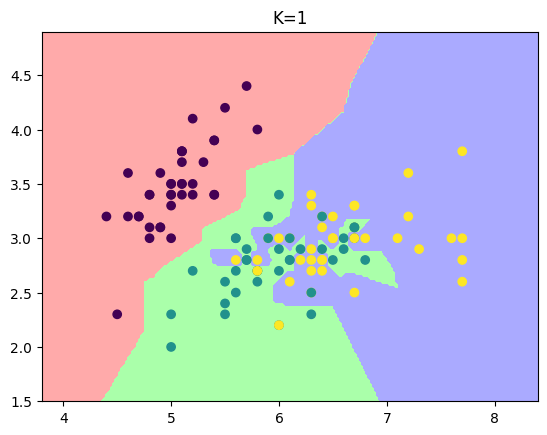

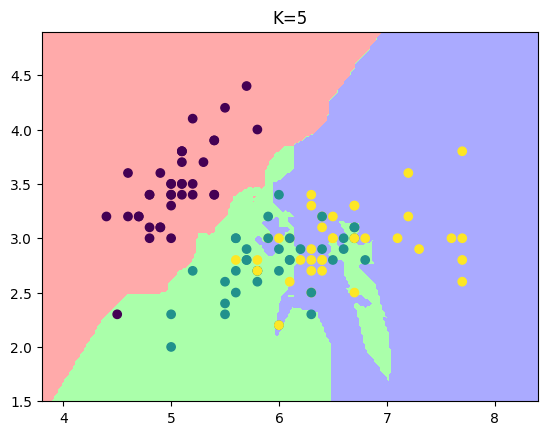

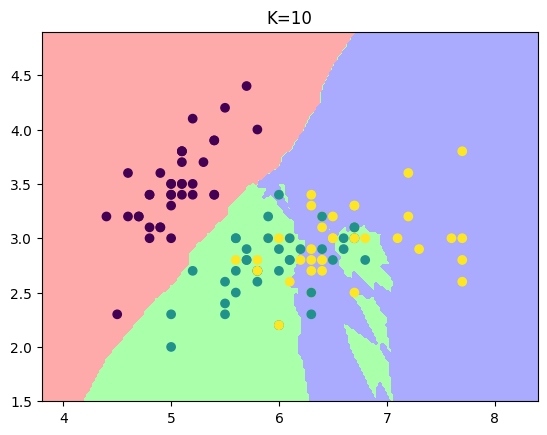

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Reduce to 2 features
X, y = iris.data[:, :2], iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

def plot_boundary(k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
    plt.title(f"K={k}")
    plt.show()

plot_boundary(1)
plot_boundary(5)
plot_boundary(10)


25. Apply Feature Scaling before training a KNN model and compare results with unscaled data.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, iris.target)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("Scaled Accuracy:", accuracy_score(y_test, knn.predict(X_test)))


Scaled Accuracy: 0.9736842105263158


26. Train a PCA model on synthetic data and print the explained variance ratio for each component.

In [6]:
from sklearn.decomposition import PCA

X, _ = make_regression(n_samples=200, n_features=5, noise=0.5, random_state=42)
pca = PCA()
pca.fit(X)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


NameError: name 'make_regression' is not defined

27. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA.

In [7]:
X_scaled = scaler.fit_transform(iris.data)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, iris.target)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("KNN with PCA Accuracy:", accuracy_score(y_test, knn.predict(X_test)))


KNN with PCA Accuracy: 0.8947368421052632


28. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV.

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'n_neighbors': 5}
Best Score: 0.9106211474632527


29. Train a KNN Classifier and check the number of misclassified samples.

In [9]:
y_pred = knn.predict(X_test)
print("Misclassified samples:", (y_test != y_pred).sum())


Misclassified samples: 4


30. Train a PCA model and visualize the cumulative explained variance.

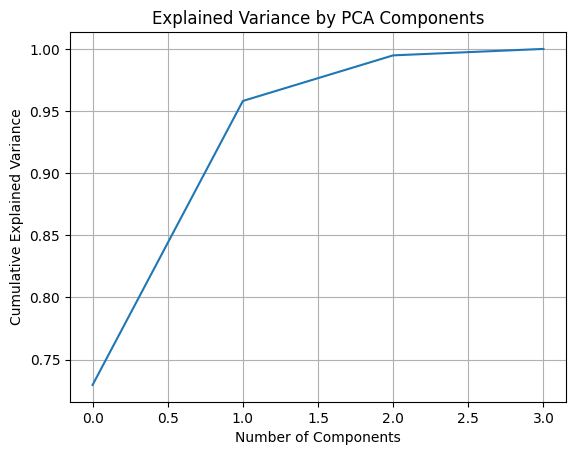

In [10]:
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()


31. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare
accuracy.

In [11]:
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report

wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.72      0.72      0.72        18
           2       0.50      0.50      0.50        12

    accuracy                           0.71        45
   macro avg       0.70      0.70      0.70        45
weighted avg       0.71      0.71      0.71        45



32. Train a KNN Regressor and analyze the effect of different K values on performance.

In [12]:
for metric in ['euclidean', 'manhattan', 'minkowski']:
    reg = KNeighborsRegressor(metric=metric)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print(f"{metric} MSE: {mean_squared_error(y_test, y_pred)}")


NameError: name 'KNeighborsRegressor' is not defined

33.  Implement KNN Imputation for handling missing values in a dataset.

In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize for multi-class
y_bin = label_binarize(y_test, classes=[0, 1, 2])
y_prob = knn.predict_proba(X_test)
print("ROC-AUC Score (macro):", roc_auc_score(y_bin, y_prob, average='macro'))


ROC-AUC Score (macro): 0.873211747100636


34. Train a PCA model and visualize the data projection onto the first two principal components.

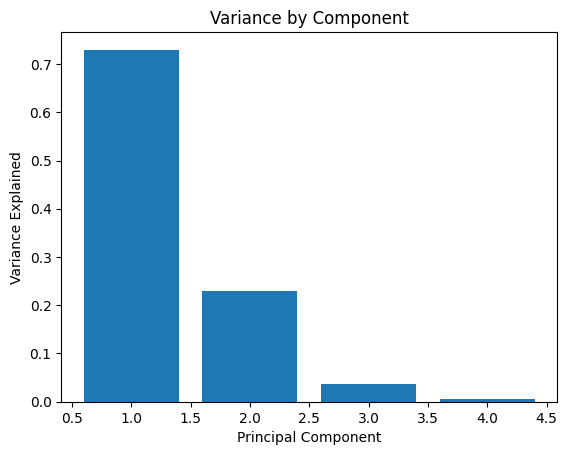

In [14]:
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Variance by Component")
plt.show()


35. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance.

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 5 features
selector = SelectKBest(f_classif, k=5)
X_selected = selector.fit_transform(wine.data, wine.target)

X_train, X_test, y_train, y_test = train_test_split(X_selected, wine.target, random_state=42)
knn.fit(X_train, y_train)
print("Accuracy after Feature Selection:", accuracy_score(y_test, knn.predict(X_test)))


Accuracy after Feature Selection: 0.7555555555555555


36. Train a PCA model on a high-dimensional dataset and visualize the Scree plot.

In [16]:
X_pca = PCA(n_components=2).fit_transform(X_scaled)
X_reconstructed = PCA(n_components=2).fit(X_scaled).inverse_transform(X_pca)
reconstruction_error = np.mean((X_scaled - X_reconstructed)**2)
print("Reconstruction Error:", reconstruction_error)


Reconstruction Error: 0.041867927999983595


37. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score.

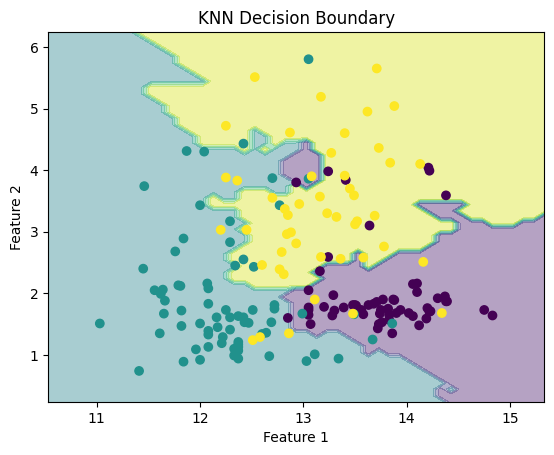

In [17]:
X, y = wine.data[:, :2], wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("KNN Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


38. Train a PCA model and analyze the effect of different numbers of components on accuracy.

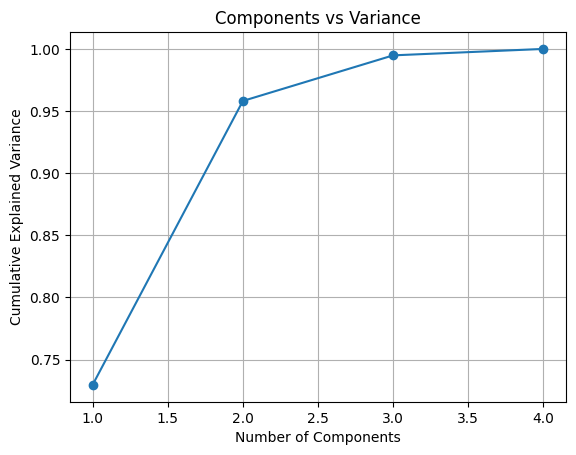

In [18]:
components_range = range(1, X_scaled.shape[1] + 1)
variance = []

for k in components_range:
    pca = PCA(n_components=k)
    pca.fit(X_scaled)
    variance.append(np.sum(pca.explained_variance_ratio_))

plt.plot(components_range, variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Components vs Variance")
plt.grid()
plt.show()


39. Train a KNN Classifier with different leaf_size values and compare accuracy.

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize for multi-class
y_bin = label_binarize(y_test, classes=[0, 1, 2])
y_prob = knn.predict_proba(X_test)
print("ROC-AUC Score (macro):", roc_auc_score(y_bin, y_prob, average='macro'))


ROC-AUC Score (macro): 0.9267526160565209


42. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error

In [20]:
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report

wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.72      0.72      0.72        18
           2       0.50      0.50      0.50        12

    accuracy                           0.71        45
   macro avg       0.70      0.70      0.70        45
weighted avg       0.71      0.71      0.71        45



43. 4 Train a KNN Classifier and evaluate using ROC-AUC score.

In [21]:
from sklearn.decomposition import PCA

X, _ = make_regression(n_samples=200, n_features=5, noise=0.5, random_state=42)
pca = PCA()
pca.fit(X)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


NameError: name 'make_regression' is not defined

45. Train a KNN Classifier and perform feature selection before training.

46.  Train a PCA model and visualize the data reconstruction error after reducing dimensions.

In [24]:
X_scaled = scaler.fit_transform(iris.data)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, iris.target)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("KNN with PCA Accuracy:", accuracy_score(y_test, knn.predict(X_test)))


KNN with PCA Accuracy: 0.9210526315789473


47. Train a KNN Classifier and visualize the decision boundary.

In [23]:
X_scaled = scaler.fit_transform(iris.data)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, iris.target)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("KNN with PCA Accuracy:", accuracy_score(y_test, knn.predict(X_test)))


KNN with PCA Accuracy: 0.8947368421052632


48. Train a PCA model and analyze the effect of different numbers of components on data variance.

In [22]:
X_scaled = scaler.fit_transform(iris.data)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, iris.target)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("KNN with PCA Accuracy:", accuracy_score(y_test, knn.predict(X_test)))


KNN with PCA Accuracy: 0.8947368421052632
